In [1]:
"""
Libraries for generating ROC curves.
"""

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

plt.rcParams.update({'font.family':'serif'})

In [2]:
# Data from first 8 hours
eight_hour_data = np.array([
    [0.8881537298874638, 0.9920043711708776],
    [0.7782377320118778, 0.9771032088166335],
    [0.6680448871177921, 0.9693838433423106],
    [0.5637375571766842, 0.9299925229651349],
    [0.4619549005498772, 0.8811322886650262],
    [0.36004646818217256, 0.831339478740136],
    [0.2667993994360837, 0.7545846928387553],
    [0.18433143556981446, 0.6341950352953097],
    [0.13238692887286244, 0.5792948283709414],
    [0.09915317957491401, 0.5109161518094841],
    [0.07710978609928813, 0.47350041546349686],
    [0.033732848751042266, 0.32103672707770214],
    [0.03205504418301245, 0.31401833733101736],
    [0.0033636839338103187, 0.022878173525754227],
    [0.00004644981856298502, 0.003561769497837421],
    [0.000006964212336926615, 0.000009501965923984272],
    [0.000006964212336926615, 0.000009501965923984272],
])

# Data from first 16 hours
sixteen_hour_data = np.array([
    [0.881063103418011,0.9928337409378638],
    [0.7800087363531699, 0.9710048686557429],
    [0.6772598812406861, 0.9503169890136509],
    [0.5744780140180843, 0.9205268681356852],
    [0.47679501744982955, 0.8811687402990915],
    [0.38149654458002635, 0.8097733649099519],
    [0.2884652449873895, 0.7402414869240436],
    [0.18892191543563294, 0.6358707983997374],
    [0.11449361611960761, 0.5393184808724383],
    [0.09739886378003167, 0.5016200813905273],
    [0.05855603243176799, 0.4290198202051502],
    [0.03501506451515742, 0.343520024375119],
    [0.029941364079583296, 0.3143062693132853],
    [0.003747275189495149, 0.11374687315243348],
    [0, 0.0019256972869626044],
    [0, 0.00422851233881226],

])

# Data from first 24 hours
twenty_four_hour_data = np.array([
    [0.8795072694888352, 0.9906353263112391],
    [0.7733098112077148, 0.9745356616177184],
    [0.6663661128030594, 0.9546029689743911],
    [0.5642234683769886, 0.929133218512594],
    [0.4623486769667245, 0.8768156986650997],
    [0.3758231817410057, 0.7774616830678932],
    [0.2765751957147211, 0.7267039655145916],
    [0.1898510460106411, 0.6576185936826455],
    [0.18399158498849416, 0.6449214058711987],
    [0.104282375591773, 0.5094318973131421],
    [0.062214943531316215, 0.43556811521855876],
    [0.033862647895054186, 0.31275849577826836],
    [0.02524918024170962, 0.2556426026986],
    [0.006168805585221109, 0.13311740982238274],
    [0.0002246923933525018, 0.004847373636490435],
])


# Data from first 48 hours
forty_eight_hour_data = np.array([
    [0.8786409938871474, 0.9935712467883111],
    [0.770355073536925, 0.9822011555210619],
    [0.6624370398900118, 0.9656831372658039],
    [0.5581336274511807, 0.9402230495537459],
    [0.46063326077001376, 0.9104848625041894],
    [0.3621200496106989, 0.8510024179739668],
    [0.2584561915806565, 0.7876503930264269],
    [0.1755853106740135, 0.6699315075067563],
    [0.09436987743025933, 0.5623183931917499],
    [0.08973984684945248, 0.5409749012506716],
    [0.0433462271645738, 0.4068861506587202],
    [0.03138859891696581, 0.33472945770094886],
    [0.008854333634365441, 0.1395498413423849],
    [0.004100478101970373, 0.08799060328548508],
    [0.0006164870570914574, 0],
])

# Data from first 72 hours
seventy_two_hour_data = np.array([
    [0.9194254948525037, 0.9964454190952986],
    [0.8054659668916169, 0.9848308233401566],
    [0.6655870806939869, 0.9579219960158281],
    [0.5580673777957752, 0.9328148989706717],
    [0.46062431918832447, 0.8947658759789825],
    [0.3366018531992095, 0.8228590583166423],
    [0.24383005093042615, 0.7421096480478446],
    [0.16967553053740386, 0.6718591721693703],
    [0.08765246016398132, 0.5830350691808887],
    [0.08194102281424087, 0.5719869020505575],
    [0.03491239844767782, 0.44694071501412713],
    [0.03348496340672255, 0.44313058893126667],
    [0.024506055342657443, 0.38021158722483867],
    [0.011246936479223488, 0.2187297201559254],
    [0.00033434017944570144, 0.0010144969479668749]
])

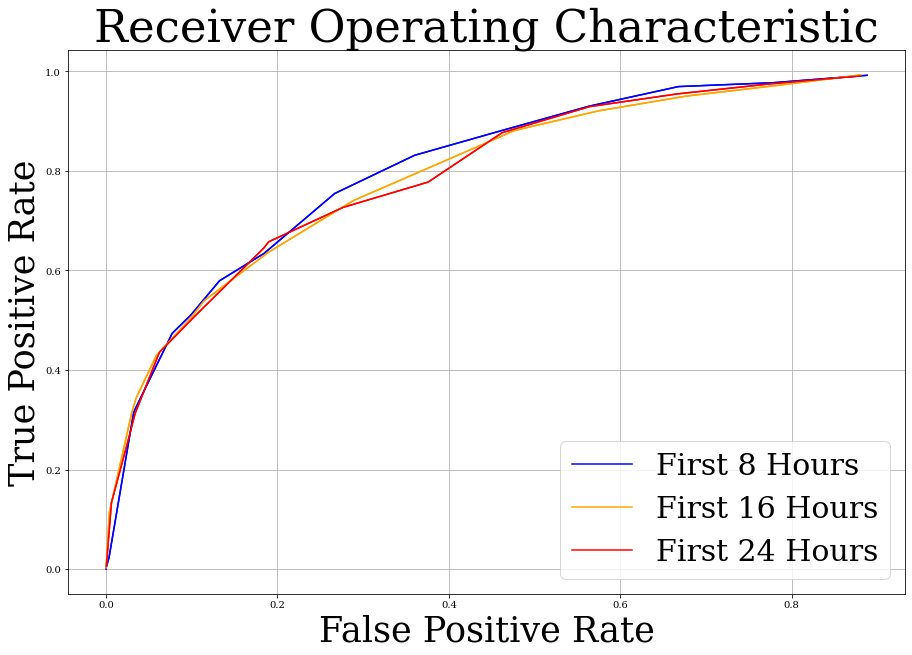

In [3]:
pyplot.figure(figsize=(15, 10))
plt.grid(True) # shows the grid
plt.xlabel('False Positive Rate', fontsize=35) # Print X title
plt.ylabel('True Positive Rate',fontsize=35) # Print Y title
plt.title("Receiver Operating Characteristic", fontsize=45)

x1, y1 = eight_hour_data.T
x2, y2 = sixteen_hour_data.T
x3, y3 = twenty_four_hour_data.T

plt.plot(x1, y1, label='First 8 Hours', color="blue")
plt.plot(x2, y2, label='First 16 Hours', color="orange")
plt.plot(x3, y3, label='First 24 Hours', color="red")
plt.legend() # Prints the label

font = font_manager.FontProperties(family='serif', style='normal', size=30)
plt.legend(prop=font)


plt.plot(x1,y1, color="blue")
plt.plot(x2,y2, color="orange")
plt.plot(x3,y3, color="red")


plt.show()

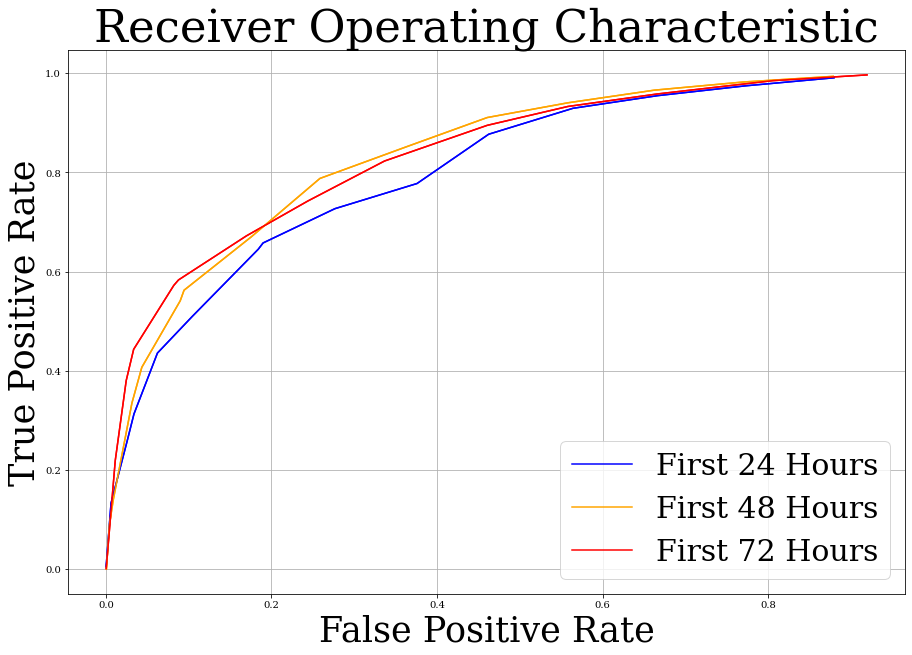

In [4]:
pyplot.figure(figsize=(15, 10))
plt.grid(True) # shows the grid
plt.xlabel('False Positive Rate', fontsize=35) # Print X title
plt.ylabel('True Positive Rate',fontsize=35) # Print Y title
plt.title("Receiver Operating Characteristic", fontsize=45)

x1, y1 = twenty_four_hour_data.T
x2, y2 = forty_eight_hour_data.T
x3, y3 = seventy_two_hour_data.T
#x4, y4 = ninety_six_hour_data.T

plt.plot(x1, y1, label='First 24 Hours', color="blue")
plt.plot(x2, y2, label='First 48 Hours', color="orange")
plt.plot(x3, y3, label='First 72 Hours', color="red")
#plt.plot(x4, y4, label='First 96 Hours', color="green")
plt.legend() # Prints the label

font = font_manager.FontProperties(family='serif', style='normal', size=30)
plt.legend(prop=font)


plt.plot(x1,y1, color="blue")
plt.plot(x2,y2, color="orange")
plt.plot(x3,y3, color="red")
#plt.plot(x4,y4, color="green")


plt.show()